Populating the interactive namespace from numpy and matplotlib
DONE (Just in case you aren't paying attention :)

`%matplotlib` prevents importing * from pylab and numpy
/home/sean/anaconda3/lib/python3.4/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/home/sean/anaconda3/lib/python3.4/site-packages/numpy/core/_methods.py:71: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/sean/anaconda3/lib/python3.4/site-packages/numpy/core/_methods.py:83: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


/home/sean/anaconda3/lib/python3.4/site-packages/numpy/core/_methods.py:95: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/sean/anaconda3/lib/python3.4/site-packages/numpy/core/_methods.py:117: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


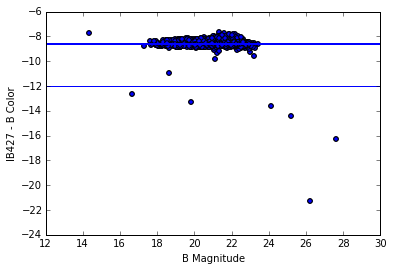

In [3]:
%pylab inline
from astropy.io import fits
import os
import glob
import re
import shutil
from astropy.io import ascii
from scipy.interpolate import interp1d
from scipy import stats

#NOTE: It's messy as all hell, but this should be run in a folder containing:
#Images to source extract
#Configuration files
#filters
#other SExtractor bits and pieces
#NO subdirectories (until I manage to vet them better)

#Change as needed
os.chdir("/home/sean/Desktop/lya_stuff/tot_run")

all_file_1 = []

for file in glob.glob('*.fits'):
    all_file_1.append(file)

all_files = list(all_file_1)


n = 0

while n < len(all_files):
    all_files[n] = all_files[n].replace("427","")
    all_files[n] = all_files[n].replace("_sci_10","")
    all_files[n] = all_files[n].replace("_sci_20","")
    n = n+1

for i,j in zip(all_file_1,all_files):
    os.rename(i,j)

#Change directory as needed
path = "/home/sean/Desktop/lya_stuff/tot_run/"

#print(all_files)

sub_dir = []

for file in all_files:
    os.chdir(path)
    num = str((re.findall('\d+', file))[0])
        
    if not os.path.exists('subaru_' + num):
        os.makedirs('subaru_' + num)
        
        folder_name = 'subaru_' + num
        sub_dir.append(folder_name)
    if "_IB_" in file:
        
        num = str((re.findall('\d+', file))[0])
        folder_name = 'subaru_' + num
                
        test = fits.open(file)
            
        test[0].data[np.where(np.isnan(test[0].data))[0],np.where(np.isnan(test[0].data))[1]] = 65535.
            
        newname_ib = "ib_"+num+"_corr.fits"
            
        test.writeto("/home/sean/Desktop/lya_stuff/tot_run/"+folder_name+"/" + newname_ib)
            
        test.close()
            
        sex_ib = open("/home/sean/Desktop/lya_stuff/tot_run/default_ib.sex","r")
            
        newsex_ib = open(path+folder_name+"/ib_"+num+".sex","w")
            
        for line in sex_ib:
            newsex_ib.write(line.replace("DEFAULT_IB",num+"_ib"))
            
        sex_ib.close()
            
        newsex_ib.close()
        
        sex_comb = open("default_comb.sex","r")
            
        newsex_comb = open(path + folder_name + "/" + "comb_" + num + ".sex","w")
            
        for line in sex_comb:
            newsex_comb.write(line.replace("DEFAULT_COMB",num+"_comb"))
            
        sex_comb.close()
        newsex_comb.close()
            
        shutil.move(path+file,path+folder_name+'/'+file)
        
    elif "_B_" in file:
        num = str((re.findall('\d+', file))[0])
        folder_name = 'subaru_' + num
        
        test = fits.open(file)
            
        test[0].data[np.where(np.isnan(test[0].data))[0],np.where(np.isnan(test[0].data))[1]] = 65535.
            
        newname_b = "b_"+num+"_corr.fits"
            
        test.writeto("/home/sean/Desktop/lya_stuff/tot_run/"+folder_name+"/" + newname_b)
            
        test.close()
            
        sex_b = open("/home/sean/Desktop/lya_stuff/tot_run/default_b.sex","r")
            
        newsex_b = open(path+folder_name+"/b_"+num+".sex","w")
            
        for line in sex_b:
            newsex_b.write(line.replace("DEFAULT_B",num+"_b"))
            
        sex_b.close()
            
        newsex_b.close()
        shutil.move(path+file,path+folder_name+'/'+file)
            
    shutil.copy2('/home/sean/Desktop/lya_stuff/tot_run/sub_param.param', '/home/sean/Desktop/lya_stuff/tot_run/'+folder_name+'/sub_param.param')
    shutil.copy2('/home/sean/Desktop/lya_stuff/tot_run/top_hat_10pix.conv', '/home/sean/Desktop/lya_stuff/tot_run/'+folder_name+'/top_hat_10pix.conv')
    shutil.copy2('/home/sean/Desktop/lya_stuff/tot_run/default.psf', '/home/sean/Desktop/lya_stuff/tot_run/'+folder_name+'/default.psf')
    shutil.copy2('/home/sean/Desktop/lya_stuff/tot_run/default.nnw', '/home/sean/Desktop/lya_stuff/tot_run/'+folder_name+'/default.nnw')
    
    os.chdir("/home/sean/Desktop/lya_stuff/tot_run/"+folder_name)
    
    #os.system("cd /home/sean/Desktop/lya_stuff/"+folder_name)
    os.system("sextractor b_"+num+"_corr.fits -c b_" + num + ".sex")
    
    #os.system("cd /home/sean/Desktop/lya_stuff/"+folder_name)
    os.system("sextractor ib_"+num+"_corr.fits -c ib_" + num + ".sex")
    
    #os.system("cd /home/sean/Desktop/lya_stuff/"+folder_name)
    os.system("sextractor ib_"+num+"_corr.fits,b_"+num+"_corr.fits -c comb_" + num + ".sex")
    
    
print("DONE (Just in case you aren't paying attention :)")
#Christ this is a wreck
#What was I thinking?
#Was I drunk?
#Couldn't have been. Drunk me just realized we've been running SExtractor at least two times for each panel
#Dumbass past-Sean put the call statements outside the bool expressions but inside the main for loop
#So it moves one file over, tries to run SExtractor three times, missing files each time
#Moves another file
#and does it again. That was dumb
#fix that


#Finding everything with a 3-sigma IB427 excess:

color_tot = []
b_mag_tot = []

for i in sub_dir:
    os.chdir(path + i)
    ib_cat = glob.glob("*_ib.cat")[0]
    comb_cat = glob.glob("*_comb.cat")[0]
    
    cat_b = ascii.read(comb_cat)
    cat_ib = ascii.read(ib_cat)

    b_mag = cat_b['MAG_AUTO']
    ib_mag = cat_ib['MAG_AUTO']

    ib_pos_y = cat_ib['Y_IMAGE']
    ib_pos_x = cat_ib['X_IMAGE']

    cat_num_ib = cat_ib['NUMBER']
    cat_num_b = cat_b['NUMBER']
    
    color = ib_mag - b_mag

    overflow_cut = color < -7.

    color = color[overflow_cut]
    b_mag = b_mag[overflow_cut]
    ib_pos_x = ib_pos_x[overflow_cut]
    ib_pos_y = ib_pos_y[overflow_cut]
    cat_num_ib = cat_num_ib[overflow_cut]
    cat_num_b = cat_num_b[overflow_cut]

    overflow_cut2 = (b_mag > 13.) & (b_mag < 30.)

    color = color[overflow_cut2]
    b_mag = b_mag[overflow_cut2]
    ib_pos_x = ib_pos_x[overflow_cut2]
    ib_pos_y = ib_pos_y[overflow_cut2]
    cat_num_ib = cat_num_ib[overflow_cut2]
    cat_num_b = cat_num_b[overflow_cut2]
    
    
    plt.scatter(b_mag,color)
    plt.axhline(np.mean(color))
    plt.xlabel("B Magnitude")
    plt.ylabel("IB427 - B Color")
    plt.savefig("CMD.png")
    
    for i in color:
        color_tot.append(i)
    for i in b_mag:
        b_mag_tot.append(i)
        
    reg_cut = color < (np.mean(color) - 3. * np.std(color))
    reg_x = ib_pos_x[reg_cut]
    reg_y = ib_pos_y[reg_cut]
    cat_num_ib = cat_num_ib[reg_cut]
    cat_num_b = cat_num_b[reg_cut]
    
    #create and write a region file for visual check
    region_file = open("ib_excess.reg","w")

    region_file.write("# Region file format: DS9 version 4.0\n")

    for i,j in zip(reg_x,reg_y):
        region_file.write("physical;circle("+str(i)+","+str(j)+",30) # color = green \n")
    
    region_file.close()
    
    
    #Files containing catalog numbers of Lya blob candidates. Can be used to do a np.where later
    ib_candidates = open("ib_candidates.txt","w")
    for i in cat_num_ib:
        ib_candidates.write(str(i) + "\n")
    ib_candidates.close()
    
    b_candidates = open("b_candidates.txt","w")
    for i in cat_num_b:
        b_candidates.write(str(i) + "\n")
    b_candidates.close()

    
os.chdir(path)

plt.scatter(b_mag_tot,color_tot)
plt.axhline(np.mean(color_tot))
plt.xlabel("B Magnitude")
plt.ylabel("IB427 - B Color")
plt.savefig("comb_CMD.png")